# Week 4 Audio Tasks

In [2]:
#Import and define function
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

def show_audio(y, sr=22050, normalise=True):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_ylim(-1,1)
    librosa.display.waveplot(np.array(y), sr=sr, ax=ax)
    return ipd.Audio(y, rate=sr, normalize=normalise, autoplay=True)

## Slicing Audio

1. Take audio data loaded into `audio1` and `audio2` and a **new audio file** that has `audio1` in the left channel and `audio2` in the right. They are **different lengths**, so you will need to come up with a solution!

In [ ]:
audio1 = librosa.load('../audio/gospel1.wav')[0]
audio2 = librosa.load('../audio/gospel2.wav')[0]
print(len(audio1), len(audio2))

#Your code here
output_file = []

show_audio(output_file)

2. Given the following sample, use a `for loop` that creates a new audio file `output_file`. This should contain the first and third quarters of `drums` in the left channel (channel 0) and the second and fourth quarters in the right channel (channel 1)

124518
0 0
1 31129
2 62258
3 93387


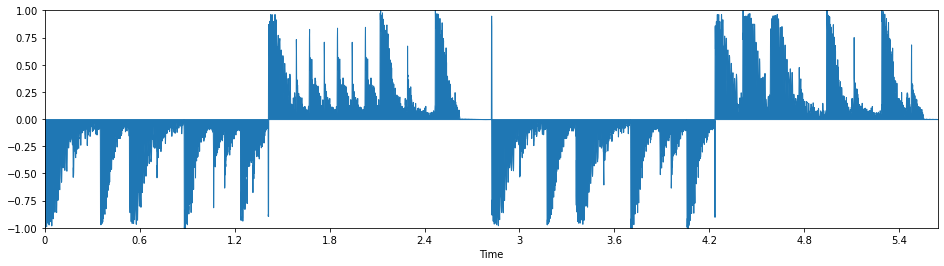

In [15]:
drums, sr = librosa.load('../audio/drums0.wav')
output_file = np.array([np.zeros(len(drums)), np.zeros(len(drums))])
print(len(drums))
#your code here

quarter = int(len(drums) / 4)

start = 0
for i in range(4):
    drum_slice = drums[quarter*i:quarter*(i+1)]
    end = start + len(drum_slice)
    print(i, start)
    row = 0
    if i % 2 == 0:
        #only every other time
        row = 1
        
    #everytime, take drum slice and store in outputfile
    output_file[row][start:end] = drum_slice
                       
    start = start + len(drum_slice)

show_audio(output_file)

3. **Building a sequencer**

Given this audio file, write some code which takes an array of 8 numbers saved in the variable `sequence`. Each item in this list represents a time step in a musical score.

Given that each time step represents an equal proportion of the `output_file`, use a `for loop` and an `if statement` to iterate through this array and insert the a copy of that sample into the `output_file` **if** the value in the `sequence` is greater than 0. 

In [ ]:
bass_drum, sr = librosa.load('../audio/kick1.wav')
output_file_size = 44100 * 4
output_file = np.zeros(output_file_size)
sequence = [1,0,0,0,1,0,1,0,0]

#your code here

show_audio(output_file)

4. **Building a multi sample sequencer**

Given this array of 3 samples (stored in the variable `samples`, edit your sequencer code from Step 3 so that sample copied at a given time slot is related to the **number in the sequence**

For example

* If there is a 0, insert nothing


* If there is a 1, insert the first sample


* If there is a 2, insert the second sample


* If there is a 3, insert the third sample

In [ ]:
file_paths = [
    '../audio/kick1.wav', '../audio/hat1.wav', '../audio/snare1.wav'
]
samples = [librosa.load(i)[0] for i in file_paths]
output_file_size = 44100 * 4
output_file = np.zeros(output_file_size)
sequence = [1,0,3,2,1,2,3,1,0]

#your code here

show_audio(output_file)

5. How would you change the speed of the sequence playback? Would your code work for sequences of different length?

6. Building an effects sequencer

Given this drum sample, use a similar `for loop` sequencer set up so that when the value is greater than zero in the score, that slice of the sound file is overwritten with a **reversed version of itself**


In [ ]:
drums, sr = librosa.load('../audio/drums5.wav')
output_file = np.zeros(len(drums))
sequence = [1,0,0,0,1,0,1,0,0]

#your code here

show_audio(output_file)

## Analysing music 

Work on these tasks in a group of 2 or more, we will discuss your findings at the end!

### Task 1

Try some of your own music in the beat tracker. What genres does it work for? What genres does it struggle with? Place your answers in the forum

If you don't music files on your computer, there are places to find royalty free music online e.g. [Blue Dot Sesssions](https://www.sessions.blue/) or [Free Music Archive](https://freemusicarchive.org/curator/Creative_Commons)

You can also try [Epidemic Sounds](https://player.epidemicsound.com/students/) as a student and get free music as long as you're not publishing it anywhere.

In [ ]:
### Add in your own audio files 
y, sr = librosa.load('../audio/drums2.wav')
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
y_beats = librosa.clicks(frames=beats, sr=sr, length = len(y))
show_audio(y + y_beats, sr)


### Task 2

Think about this for the discussion at the end, what are some qualities of sound or music that you think machines would have trouble analysing? Place your answers in the forum